In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [302]:
data = pd.read_csv("/Users/maxkucher/data_handling/ML_projects/car_prices.csv")
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [303]:
data.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [304]:
data.enginesize

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

In [305]:
data.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [306]:
scaler = MinMaxScaler()


features_to_scale = ["wheelbase", "enginesize", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "carlength", "carwidth", "carheight", "curbweight", "highwaympg", "carlength", "carwidth", "symboling", "boreratio"]

for i in features_to_scale:
    data[i] = scaler.fit_transform(data[[i]])
    
# data["wheelbase"] = scaler.fit_transform(data[["wheelbase"]])
# data["enginesize"] = scaler.fit_transform(data[["enginesize"]])
# data["stroke"] = scaler.fit_transform(data[["stroke"]])
# data["compressionratio"] = scaler.fit_transform(data[["compressionratio"]])
# data["horsepower"] = scaler.fit_transform(data[["horsepower"]])
# data["peakrpm"] = scaler.fit_transform(data[["peakrpm"]])
# data["citympg"] = scaler.fit_transform(data[["citympg"]])
# data["highwaympg"] = scaler.fit_transform(data[["highwaympg"]])
# data["carlength"] = scaler.fit_transform(data[["carlength"]])
# data["carwidth"] = scaler.fit_transform(data[["carwidth"]])

# data["carheight"] = scaler.fit_transform(data[["carheight"]])
# data["curbweight"] = scaler.fit_transform(data[["curbweight"]])
# data["highwaympg"] = scaler.fit_transform(data[["highwaympg"]])
# data["carlength"] = scaler.fit_transform(data[["carlength"]])
# data["carwidth"] = scaler.fit_transform(data[["carwidth"]])
# data["symboling"] = scaler.fit_transform(data[["symboling"]])
# data["boreratio"] = scaler.fit_transform(data[["boreratio"]])

In [307]:
data = data.drop("name", axis="columns")

In [308]:
data

,ID,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1.0,gas,std,two,convertible,rwd,front,0.058309,0.413433,...,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,2,1.0,gas,std,two,convertible,rwd,front,0.058309,0.413433,...,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,3,0.6,gas,std,two,hatchback,rwd,front,0.230321,0.449254,...,0.343396,mpfi,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,4,0.8,gas,std,four,sedan,fwd,front,0.384840,0.529851,...,0.181132,mpfi,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,5,0.8,gas,std,four,sedan,4wd,front,0.373178,0.529851,...,0.283019,mpfi,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,0.2,gas,std,four,sedan,rwd,front,0.655977,0.711940,...,0.301887,mpfi,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,202,0.2,gas,turbo,four,sedan,rwd,front,0.655977,0.711940,...,0.301887,mpfi,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,203,0.2,gas,std,four,sedan,rwd,front,0.655977,0.711940,...,0.422642,mpfi,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,204,0.2,diesel,turbo,four,sedan,rwd,front,0.655977,0.711940,...,0.316981,idi,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


In [309]:
data.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [310]:
data.replace({"fuelsystem": {"mpfi": 0, "2bbl": 1, "mfi": 2, "1bbl": 3, "spfi": 4, "4bbl": 5, "idi": 6, "spdi": 7}}, inplace=True)
data["fuelsystem"] = scaler.fit_transform(data[["fuelsystem"]])

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/2569210497.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"fuelsystem": {"mpfi": 0, "2bbl": 1, "mfi": 2, "1bbl": 3, "spfi": 4, "4bbl": 5, "idi": 6, "spdi": 7}}, inplace=True)


In [311]:
data.replace({"fueltypes": {"gas": 0, "diesel": 1}}, inplace=True)

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/2111725300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"fueltypes": {"gas": 0, "diesel": 1}}, inplace=True)


In [312]:
data.replace({"doornumbers": {"two": 0, "four": 1}}, inplace=True)
data.replace({"aspiration": {"turbo": 0, "std": 1}}, inplace=True)
data.replace({"enginelocation": {"front": 0, "rear": 1}}, inplace=True)

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/17797134.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"doornumbers": {"two": 0, "four": 1}}, inplace=True)
/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/17797134.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"aspiration": {"turbo": 0, "std": 1}}, inplace=True)
/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/17797134.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and wil

In [313]:
data.replace({"drivewheels": {"rwd": 0, "fwd": 1, "4wd": 2}}, inplace=True)
data["drivewheels"] = scaler.fit_transform(data[["drivewheels"]])

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/3757205201.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"drivewheels": {"rwd": 0, "fwd": 1, "4wd": 2}}, inplace=True)


In [314]:
data.replace({"carbody": {"convertible": 0, "hatchback": 1, "sedan": 2, "wagon": 3, "hardtop": 4}}, inplace=True)
data["carbody"] = scaler.fit_transform(data[["carbody"]])


/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/946975760.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"carbody": {"convertible": 0, "hatchback": 1, "sedan": 2, "wagon": 3, "hardtop": 4}}, inplace=True)


In [315]:
data

,ID,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1.0,0,1,0,0.00,0.0,0,0.058309,0.413433,...,0.260377,0.000000,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,2,1.0,0,1,0,0.00,0.0,0,0.058309,0.413433,...,0.260377,0.000000,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,3,0.6,0,1,0,0.25,0.0,0,0.230321,0.449254,...,0.343396,0.000000,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,4,0.8,0,1,1,0.50,0.5,0,0.384840,0.529851,...,0.181132,0.000000,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,5,0.8,0,1,1,0.50,1.0,0,0.373178,0.529851,...,0.283019,0.000000,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,0.2,0,1,1,0.50,0.0,0,0.655977,0.711940,...,0.301887,0.000000,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,202,0.2,0,0,1,0.50,0.0,0,0.655977,0.711940,...,0.301887,0.000000,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,203,0.2,0,1,1,0.50,0.0,0,0.655977,0.711940,...,0.422642,0.000000,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,204,0.2,1,0,1,0.50,0.0,0,0.655977,0.711940,...,0.316981,0.857143,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


In [316]:
# for i in data.index:
#     for column in data.columns:
#         if data.loc[i, column] == "four":
#             print(column)
            

In [317]:
data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [318]:
data.replace({"enginetype": {"dohc": 0, "ohcv": 1, "ohc": 2, "l": 3, "rotor": 4, "ohcf": 5, "dohcv": 6}}, inplace=True)
data["enginetype"] = scaler.fit_transform(data[["enginetype"]])

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/2384846900.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"enginetype": {"dohc": 0, "ohcv": 1, "ohc": 2, "l": 3, "rotor": 4, "ohcf": 5, "dohcv": 6}}, inplace=True)


In [319]:
data.replace({"cylindernumber": {"four": 0, "six": 1, "five": 2, "three": 3, "twelve": 4, "two": 5, "eight": 6}}, inplace=True)
data["enginetype"] = scaler.fit_transform(data[["cylindernumber"]])

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_92600/2801635181.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"cylindernumber": {"four": 0, "six": 1, "five": 2, "three": 3, "twelve": 4, "two": 5, "eight": 6}}, inplace=True)


In [320]:
for column in data.columns:
    print(f"Column: {column}, type: {data[column].dtypes}\n")

Column: ID, type: int64

Column: symboling, type: float64

Column: fueltypes, type: int64

Column: aspiration, type: int64

Column: doornumbers, type: int64

Column: carbody, type: float64

Column: drivewheels, type: float64

Column: enginelocation, type: int64

Column: wheelbase, type: float64

Column: carlength, type: float64

Column: carwidth, type: float64

Column: carheight, type: float64

Column: curbweight, type: float64

Column: enginetype, type: float64

Column: cylindernumber, type: int64

Column: enginesize, type: float64

Column: fuelsystem, type: float64

Column: boreratio, type: float64

Column: stroke, type: float64

Column: compressionratio, type: float64

Column: horsepower, type: float64

Column: peakrpm, type: float64

Column: citympg, type: float64

Column: highwaympg, type: float64

Column: price, type: float64



In [321]:
x = data.drop(["price", "ID"], axis="columns")
y = data["price"]

In [322]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [323]:
# cross_val_score(LinearRegression(), x, y)

In [324]:
# choosen way
cross_val_score(RandomForestRegressor(), x, y)

array([ 0.85989466,  0.89303478, -1.45570154,  0.89526481,  0.67592756])

In [325]:
# cross_val_score(DecisionTreeRegressor(), x, y)

In [326]:
# cross_val_score(SVR(), x, y) 

In [327]:
# cross_val_score(KNeighborsRegressor(), x, y)

In [328]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [329]:
model.score(x_test, y_test)

0.9336743607999827

In [330]:
preds = model.predict(x_test)

In [331]:
pred_data = pd.DataFrame({"Predicted data": preds.squeeze(), "Actual data": y_test.squeeze()})
pred_data

,Predicted data,Actual data
191,16043.130000,13295.000
163,8312.435000,8058.000
75,18265.270000,16503.000
195,15568.780000,13415.000
63,10003.150000,10795.000
13,18906.950000,21105.000
49,36892.800000,36000.000
2,14011.090000,16500.000
192,11855.843333,13845.000
67,29247.760000,25552.000


In [332]:
data["Predicted"] = model.predict(x)

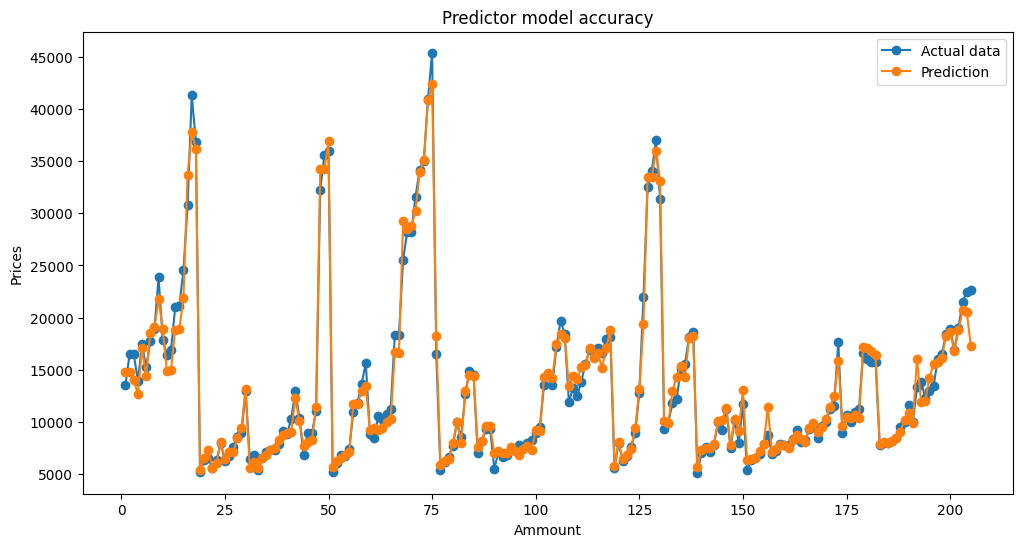

In [333]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.plot(data['ID'], data['price'], label='Actual data', marker='o')
plt.plot(data['ID'], data['Predicted'], label='Prediction', marker='o')


plt.xlabel('Ammount')
plt.ylabel('Prices')
plt.title('Predictor model accuracy')
plt.legend()
plt.show()


In [334]:
x_train.head(1)

,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
118,0.6,0,1,0,0.25,0.5,0,0.206997,0.241791,0.291667,...,0,0.109434,0.142857,0.307143,0.552381,0.15,0.083333,0.55102,0.666667,0.657895


In [338]:
custom_pred = model.predict([[0.4, 0, 0, 0, 0.25, 0.5, 1, 0.23, 0.24, 0.29, 0, 0 , 0, 0 , 0.1, 0.15, 0.3, 0.4, 0.1, 0.03, 0.3, 0.52, 0.4]])
print(custom_pred)

[6314.105]


/Users/maxkucher/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
